# Load The Base Libs

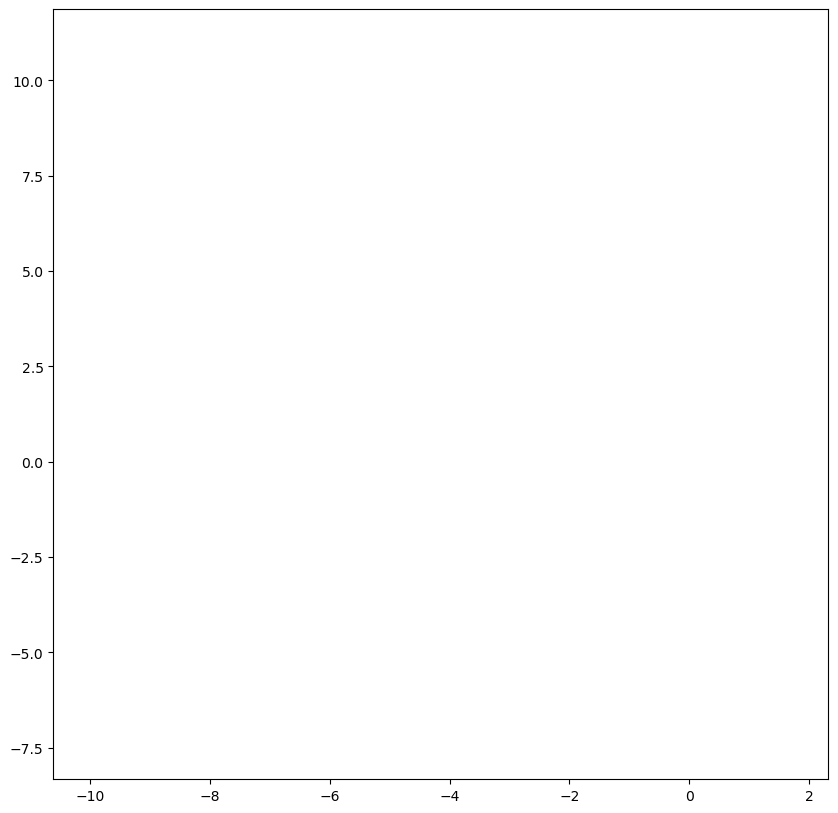

In [4]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from matplotlib import style, cm
import matplotlib.tri as mtri


# Load the database
data = pd.read_csv('Base13.csv')

# Print the data clusters
plt.figure(figsize=(10,10))
x = []
x.append(data.iloc[:,0:2].values)
X = np.array(data.values[:, :2])
x.append(data.iloc[:,2:3].values)

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], color="red")
plt.show()

X= np.array(data.values[:, :2])
label= np.array(data.values[:, 2])

# Coesion Function

In [12]:
from sklearn.metrics import accuracy_score, silhouette_score, pairwise_distances

def coesion_value(X, labels):
    each_label= np.unique(labels)
    valu= 0
    for lab in each_label:
        if lab!=-1:
            indexes= np.where(labels == lab)
            indexes= indexes[0]
            subX= np.take(X, indexes, axis=0)
            valu+= np.sum(pairwise_distances(subX, metric='sqeuclidean', n_jobs=-1))
    return np.sqrt(valu)

# Separation Function

In [13]:
def separation_value(X, labels):
    each_label= np.unique(labels)
    value= 0

    for lab in each_label:
        if lab!=-1:
            index_X= np.where(labels == lab)
            index_X= index_X[0]

            index_Y= np.where(np.logical_and(labels != lab, labels!=-1))
            index_Y= index_Y[0]

            subX= np.take(X, index_X, axis=0)
            subY= np.take(X, index_Y, axis=0)

            # distance between points
            value+= np.sum(pairwise_distances(subX, subY, metric='sqeuclidean', n_jobs=-1))
    return np.sqrt(value)

# Entropy Function

In [14]:
def entropy_value(X, label_class, label_dataset):
    cluster_labels= np.unique(label_dataset)
    entropia_valueE= 0
    for label in cluster_labels:

        entropia_c= 0

        cluster_index= np.where(label_dataset == label)
        cluster_index= cluster_index[0]
        cluster_classes= np.take(label_class, cluster_index)

        classes, points_c= np.unique(cluster_classes, return_counts=True)
        cluster_sum= np.sum(points_c)
        if classes[0]==-1:
            points_c= points_c[1:]
        points_c= points_c / cluster_sum

        for p in points_c:
            entropia_c+= p * np.log2(p)
            entropia_valueE-= entropia_c

            entropia_valueE/= len(cluster_labels)
    return entropia_valueE

# K-Means

In [20]:
from sklearn.cluster import KMeans

# Define the parameters
kmeans_parameters = {
    "n_clusters": [i for i in range(2, 9)],
    "max_iter": [j for j in range(1, 11)]
}

# Define the size of the parameters
cluster_size= np.shape(kmeans_parameters['n_clusters'])[0]
iter_size= np.shape(kmeans_parameters['max_iter'])[0]

# Generate the matrix of values
kmeans_value_coesao= np.zeros((cluster_size, iter_size))
kmeans_value_separabilidade= np.zeros((cluster_size, iter_size))
kmeans_value_entropia= np.zeros((cluster_size, iter_size))
kmeans_value_silhueta= np.zeros((cluster_size, iter_size))

i= 0
j= 0

# Calculate the values
for n_cluster in kmeans_parameters["n_clusters"]:
    j= 0
    for iteration in kmeans_parameters["max_iter"]:
        kmc= KMeans(n_clusters=n_cluster, max_iter=iteration).fit(X)
        kmc_labels= kmc.labels_
        coesao = coesion_value(X, kmc_labels)
        separabilidade = separation_value(X, kmc_labels)
        entropia = entropy_value(X, kmc_labels, label)
        silhueta = silhouette_score(X, kmc_labels, metric='euclidean')

        kmeans_value_coesao[i, j]= coesao
        kmeans_value_separabilidade[i, j]= separabilidade
        kmeans_value_entropia[i, j]= entropia
        kmeans_value_silhueta[i, j]= silhueta

        j += 1
    i += 1

# Get the shape of the matrix
template_shape= np.shape(kmeans_value_coesao)

# Get the best scores
maxScore_coesao_kmeans= np.min(kmeans_value_coesao)
minScore_separabilidade_kmeans= np.max(kmeans_value_separabilidade)
minScore_entropia_kmeans= np.min(kmeans_value_entropia )
maxScore_silhueta_kmeans = np.max(kmeans_value_silhueta)

# Get the parameters values
index_coesion = np.unravel_index(np.argmin(kmeans_value_coesao), template_shape)
index_separation = np.unravel_index(np.argmax(kmeans_value_separabilidade), template_shape)
index_entropy = np.unravel_index(np.argmin(kmeans_value_entropia ), template_shape)
index_silhouette = np.unravel_index(np.argmax(kmeans_value_silhueta), template_shape)

# Get the best parameters
bestIter_coesion = kmeans_parameters['max_iter'][index_coesion[1]]
bestN_coesion = kmeans_parameters['n_clusters'][index_coesion[0]]

bestIter_separation = kmeans_parameters['max_iter'][index_separation[1]]
bestN_separation = kmeans_parameters['n_clusters'][index_separation[0]]

bestIter_entropy = kmeans_parameters['max_iter'][index_entropy[1]]
bestN_entropy = kmeans_parameters['n_clusters'][index_entropy[0]]

bestIter_silhouette = kmeans_parameters['max_iter'][index_silhouette[1]]
bestN_silhouette = kmeans_parameters['n_clusters'][index_silhouette[0]]

# Show the best Results
print("KMEANS")
print(f"\nCoesion\n Best Score = {maxScore_coesao_kmeans}\n {bestIter_coesion} Iterations {bestN_coesion} Centroids")
print(f"\nSeparation:\n Best Score ->{minScore_separabilidade_kmeans}\n {bestIter_separation} Iterations {bestN_separation} Centroids")
print(f"\nEntropy:\n Best Score = {minScore_entropia_kmeans}\n {bestIter_entropy} Iterations {bestN_entropy} Centroids")
print(f"\nSilhouette:\n Best Score = {maxScore_silhueta_kmeans}\n {bestIter_silhouette} Iterations {bestN_silhouette} Centroids")


/home/mclovin/work/DataMining/python/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mclovin/work/DataMining/python/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mclovin/work/DataMining/python/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mclovin/work/DataMining/python/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureW

KMEANS

Coesion
 Best Score = 1116.9308509521716
 8 Iterations 8 Centroids

Separation:
 Best Score ->14566.432457917756
 8 Iterations 8 Centroids

Entropy:
 Best Score = 0.0016184976538211682
 2 Iterations 2 Centroids

Silhouette:
 Best Score = 0.7340603197128724
 1 Iterations 2 Centroids


# DB Scan

In [40]:
from sklearn.cluster import DBSCAN

# Define the parameters
dbsacn_p= {
    "eps": [i/100 for i in range(1, 16)],
    "min_samples": [i for i in range(3, 14)]
}

# List of validated parameters
validated_params = []

# Find the best parameters
for epsx in dbsacn_p["eps"]:
    j= 0
    for min_sample in dbsacn_p["min_samples"]:
        dbs= DBSCAN(eps=epsx, min_samples=min_sample).fit(X)
        dbs_labels= dbs.labels_

        # Save the validated parameters
        if(len(np.unique(dbs_labels)) <= 3):
            validated_params.append([epsx, min_sample])

# Get the unique values
validated_params = np.array(validated_params)
unique_eps= np.unique(validated_params[:, 0])
unique_samples= np.unique(validated_params[:, 1])

# Get the matrix size
matrix_size= ((np.shape(unique_eps)[0], np.shape(unique_samples)[0]))

# Generate the matrix of values
dbsacn_value_coesao= np.zeros(matrix_size)
dbscan_value_separabilidade= np.zeros(matrix_size)
dbscan_value_entropia= np.zeros(matrix_size)
dbscan_value_silhueta= np.zeros(matrix_size)

i= 0
j= 0

# Calculate the values
for eps in unique_eps:
    j = 0
    for sample in unique_samples:
        if [eps, sample] in validated_params.tolist():
          dbs = DBSCAN(eps=eps, min_samples=int(sample), n_jobs=-1).fit(X)
          dbs_labels= dbs.labels_

          # Ensure there's more than one cluster
          if len(set(dbs_labels)) > 1:  
              coesion = coesion_value(X, dbs_labels)
              entropy = entropy_value(X, dbs_labels, label)
              separation = entropy_value(X, dbs_labels, label)
              silhouette = silhouette_score(X, dbs_labels, metric='euclidean')

              dbsacn_value_coesao[i, j] = coesion
              dbscan_value_separabilidade[i, j] = separation
              dbscan_value_entropia[i, j] = entropy
              dbscan_value_silhueta[i, j] = silhouette
          else:
              dbsacn_value_coesao[i, j] = float("inf")
              dbscan_value_separabilidade[i, j] = float("inf")
              dbscan_value_entropia[i, j] = float("inf")
              dbscan_value_silhueta[i, j] = float("inf")

        j+=1
    i+=1

# Get the best values
dbsacn_value_coesao_= np.where(dbsacn_value_coesao == float("inf"), np.min(dbsacn_value_coesao)*.99, dbsacn_value_coesao)
dbscan_value_separabilidade_= np.where(dbscan_value_separabilidade == float("inf"), np.min(dbscan_value_separabilidade)*.99, dbscan_value_separabilidade)
dbscan_value_entropia_= np.where(dbscan_value_entropia == float("inf"), np.min(dbscan_value_entropia)*.99, dbscan_value_entropia)
dbscan_value_silhueta = np.where(dbscan_value_silhueta == float("inf"), np.min(dbscan_value_silhueta)*.99, dbscan_value_silhueta)


dbscan_value_separabilidade= np.where(dbsacn_value_coesao == float("inf"), 0, dbsacn_value_coesao)
dbscan_value_silhueta = np.where(dbscan_value_silhueta == float("inf"), 0, dbscan_value_silhueta)
template_shape= np.shape(dbsacn_value_coesao)

maxScore_coesao_dbs= np.min(dbsacn_value_coesao)
minScore_separabilidade_dbs= np.max(dbscan_value_separabilidade)
minScore_entropia_dbs= np.min(dbscan_value_entropia)
maxScore_silhueta_dbs = np.max(dbscan_value_silhueta)

index_coesao= np.unravel_index(np.argmin(dbsacn_value_coesao), template_shape)
index_separabilidade= np.unravel_index(np.argmax(dbscan_value_separabilidade), template_shape)
index_entropia= np.unravel_index(np.argmin(dbscan_value_entropia), template_shape)
index_silhueta= np.unravel_index(np.argmax(dbscan_value_silhueta), template_shape)

bestEps_coesao= unique_eps[index_coesao[0]]
bestMinSamples_coesao= unique_samples[index_coesao[1]]

bestEps_separabilidade= unique_eps[index_separabilidade[0]]
bestMinSamples_separabilidade= unique_samples[index_separabilidade[1]]

bestEps_entropia= unique_eps[index_entropia[0]]
bestMinSamples_entropia= unique_samples[index_entropia[1]]

bestEps_silhueta= unique_eps[index_silhueta[0]]
bestEps_silhueta= unique_samples[index_silhueta[1]]

# Show the best Results
print("DBSCAN")
print(f"\nCoesion\n Best Score = {maxScore_coesao_dbs}\n Radius = {bestEps_coesao}\n Min. Points = {bestMinSamples_coesao} ")
print(f"\nSeparation:\n Best Score = {minScore_separabilidade_dbs}\n Radius = {bestEps_separabilidade}\n Min. Points = {bestMinSamples_separabilidade} ")
print(f"\nEntropy:\n Best Score = {minScore_entropia_dbs}\n Radius = {bestEps_entropia}\n Min. Points = {bestMinSamples_entropia} ")
print(f"\nSilhouette:\n Best Score = {maxScore_silhueta_dbs}\n Radius = {bestEps_silhueta}\n Min. Points = {bestEps_silhueta} ")


DBSCAN

Coesion
 Best Score = 0.0
 Radius = 0.03
 Min. Points = 3.0 

Separation:
 Best Score = 3.5929164107407665
 Radius = 0.15
 Min. Points = 11.0 

Entropy:
 Best Score = 0.0
 Radius = 0.03
 Min. Points = 3.0 

Silhouette:
 Best Score = 0.0
 Radius = 3.0
 Min. Points = 3.0 


In [38]:
# Get the unique values
unique_eps= np.unique(validated_params[:, 0])
unique_samples= np.unique(validated_params[:, 1])

# Get the matrix size
matrix_size= ((np.shape(unique_eps)[0], np.shape(unique_samples)[0]))

# Generate the matrix of values
dbsacn_value_coesao= np.zeros(matrix_size)
dbscan_value_separabilidade= np.zeros(matrix_size)
dbscan_value_entropia= np.zeros(matrix_size)
dbscan_value_silhueta= np.zeros(matrix_size)

i= 0
j= 0

# Calculate the values
for eps in unique_eps:
    j = 0
    for sample in unique_samples:
        if [eps, sample] in validated_params.tolist():
          dbs = DBSCAN(eps=eps, min_samples=int(sample), n_jobs=-1).fit(X)
          dbs_labels= dbs.labels_

          # Ensure there's more than one cluster
          if len(set(dbs_labels)) > 1:  
              coesion = coesion_value(X, dbs_labels)
              entropy = entropy_value(X, dbs_labels, label)
              separation = entropy_value(X, dbs_labels, label)
              silhouette = silhouette_score(X, dbs_labels, metric='euclidean')

              dbsacn_value_coesao[i, j] = coesion
              dbscan_value_separabilidade[i, j] = separation
              dbscan_value_entropia[i, j] = entropy
              dbscan_value_silhueta[i, j] = silhouette
          else:
              dbsacn_value_coesao[i, j] = float("inf")
              dbscan_value_separabilidade[i, j] = float("inf")
              dbscan_value_entropia[i, j] = float("inf")
              dbscan_value_silhueta[i, j] = float("inf")

        j+=1
    i+=1

# Get the best values
dbsacn_value_coesao_= np.where(dbsacn_value_coesao == float("inf"), np.min(dbsacn_value_coesao)*.99, dbsacn_value_coesao)
dbscan_value_separabilidade_= np.where(dbscan_value_separabilidade == float("inf"), np.min(dbscan_value_separabilidade)*.99, dbscan_value_separabilidade)
dbscan_value_entropia_= np.where(dbscan_value_entropia == float("inf"), np.min(dbscan_value_entropia)*.99, dbscan_value_entropia)
dbscan_value_silhueta = np.where(dbscan_value_silhueta == float("inf"), np.min(dbscan_value_silhueta)*.99, dbscan_value_silhueta)


dbscan_value_separabilidade= np.where(dbsacn_value_coesao == float("inf"), 0, dbsacn_value_coesao)
dbscan_value_silhueta = np.where(dbscan_value_silhueta == float("inf"), 0, dbscan_value_silhueta)
template_shape= np.shape(dbsacn_value_coesao)

maxScore_coesao_dbs= np.min(dbsacn_value_coesao)
minScore_separabilidade_dbs= np.max(dbscan_value_separabilidade)
minScore_entropia_dbs= np.min(dbscan_value_entropia)
maxScore_silhueta_dbs = np.max(dbscan_value_silhueta)

index_coesao= np.unravel_index(np.argmin(dbsacn_value_coesao), template_shape)
index_separabilidade= np.unravel_index(np.argmax(dbscan_value_separabilidade), template_shape)
index_entropia= np.unravel_index(np.argmin(dbscan_value_entropia), template_shape)
index_silhueta= np.unravel_index(np.argmax(dbscan_value_silhueta), template_shape)

bestEps_coesao= unique_eps[index_coesao[0]]
bestMinSamples_coesao= unique_samples[index_coesao[1]]

bestEps_separabilidade= unique_eps[index_separabilidade[0]]
bestMinSamples_separabilidade= unique_samples[index_separabilidade[1]]

bestEps_entropia= unique_eps[index_entropia[0]]
bestMinSamples_entropia= unique_samples[index_entropia[1]]

bestEps_silhueta= unique_eps[index_silhueta[0]]
bestEps_silhueta= unique_samples[index_silhueta[1]]

# Show the best Results
print("DBSCAN")
print(f"\nCoesion\n Best Score = {maxScore_coesao_dbs}\n Radius = {bestEps_coesao}\n Min. Points = {bestMinSamples_coesao} ")
print(f"\nSeparation:\n Best Score = {minScore_separabilidade_dbs}\n Radius = {bestEps_separabilidade}\n Min. Points = {bestMinSamples_separabilidade} ")
print(f"\nEntropy:\n Best Score = {minScore_entropia_dbs}\n Radius = {bestEps_entropia}\n Min. Points = {bestMinSamples_entropia} ")
print(f"\nSilhouette:\n Best Score = {maxScore_silhueta_dbs}\n Radius = {bestEps_silhueta}\n Min. Points = {bestEps_silhueta} ")


DBSCAN

Coesion
 Best Score = 0.0
 Radius = 0.03
 Min. Points = 3.0 

Separation:
 Best Score = 3.5929164107407665
 Radius = 0.15
 Min. Points = 11.0 

Entropy:
 Best Score = 0.0
 Radius = 0.03
 Min. Points = 3.0 

Silhouette:
 Best Score = 0.0
 Radius = 3.0
 Min. Points = 3.0 


In [51]:
from sklearn.cluster import AgglomerativeClustering

# Dictionary of linkages
linkage_dict = {
    0: "ward",
    1: "complete",
    2: "single"
}

# Define the parameters
agc_parameters = {
    'n_clusters': [i for i in range(2, 9)],
    'linkage': [0, 1, 2]
}

# Define the size of the parameters
cluster_size= np.shape(agc_parameters['n_clusters'])[0]
linkage_size= np.shape(agc_parameters['linkage'])[0]

# Generate the matrix of values
agnes_value_coesao = np.zeros((cluster_size, linkage_size))
agnes_value_separabilidade = np.zeros((cluster_size, linkage_size))
agnes_value_entropia = np.zeros((cluster_size, linkage_size))
agnes_value_silhueta = np.zeros((cluster_size, linkage_size))

i= 0
j= 0

# Calculate the values
for n_cluster in agc_parameters['n_clusters']:
    j= 0
    for linkage in agc_parameters['linkage']:
        agc= AgglomerativeClustering(linkage=linkage_dict[linkage], n_clusters=n_cluster).fit(X)
        agc_labels= agc.labels_

        coesao = coesion_value(X, agc_labels)
        separabilidade = separation_value(X, agc_labels)
        entropia = entropy_value(X, agc_labels, label)
        silhueta  = silhouette_score(X, agc_labels, metric='euclidean')

        agnes_value_coesao[i, j]= coesao
        agnes_value_separabilidade[i, j]= separabilidade
        agnes_value_entropia[i, j]= entropia
        agnes_value_silhueta[i, j]= silhueta
        j += 1
    i += 1

template_shape= np.shape(agnes_value_coesao)

# Save the best values
maxScore_coesao_ag= np.min(agnes_value_coesao)
minScore_separabilidade_ag= np.max(agnes_value_separabilidade)
minScore_entropia_ag= np.min(agnes_value_entropia)
maxScore_silhueta_ag= np.max(agnes_value_silhueta)

index_coesao = np.unravel_index(np.argmin(agnes_value_coesao), template_shape)
index_separabilidade = np.unravel_index(np.argmax(agnes_value_separabilidade), template_shape)
index_entropia = np.unravel_index(np.argmin(agnes_value_entropia), template_shape)
index_silhueta = np.unravel_index(np.argmax(agnes_value_silhueta), template_shape)

bestNAg_coesao = agc_parameters['n_clusters'][index_coesao[0]]
bestLinkage_coesao = agc_parameters['linkage'][index_coesao[1]]

bestNAg_separabilidade = agc_parameters['n_clusters'][index_separabilidade[0]]
bestLinkage_separabilidade = agc_parameters['linkage'][index_separabilidade[1]]

bestNAg_entropia = agc_parameters['n_clusters'][index_entropia[0]]
bestLinkage_entropia=  agc_parameters['linkage'][index_entropia[1]]

bestNAg_silhueta = agc_parameters['n_clusters'][index_silhueta[0]]
bestLinkage_silhueta = agc_parameters['linkage'][index_silhueta[1]]

# Show the best Results
print("AGNES")
print(f"\nCoesion\n Best Score = {maxScore_coesao_ag}\n {bestNAg_coesao} Clusters {linkage_dict[bestLinkage_coesao]}\n")
print(f"\nSeparation:\n Best Score = {minScore_separabilidade_ag}\n {bestNAg_separabilidade} Clusters {linkage_dict[bestLinkage_separabilidade]}\n")
print(f"\nEntropy:\n Best Score = {minScore_entropia_ag}\n {bestNAg_entropia} Clusters {linkage_dict[bestLinkage_entropia]}\n")
print(f"\nSilhouette:\n Best Score = {maxScore_silhueta_ag}\n {bestNAg_silhueta} Clusters\n {linkage_dict[bestLinkage_silhueta]} Similarity\n")


AGNES

Coesion
 Best Score = 1277.1630760091455
 8 Clusters ward


Separation:
 Best Score = 14553.258863710476
 8 Clusters ward


Entropy:
 Best Score = 0.000627669145639139
 2 Clusters complete


Silhouette:
 Best Score = 0.7342738916905114
 2 Clusters
 complete Similarity



# Compare the Clusters Systems

In [52]:
coesao_row= [maxScore_coesao_kmeans,maxScore_coesao_dbs,maxScore_coesao_ag]

separabilidade_row= [minScore_separabilidade_kmeans,minScore_separabilidade_dbs,minScore_separabilidade_ag]

entropia_row= [minScore_entropia_kmeans,minScore_entropia_dbs,minScore_entropia_ag]

silhouette_row= [maxScore_silhueta_kmeans,maxScore_silhueta_dbs,maxScore_silhueta_ag]

storage= [
    coesao_row,
    separabilidade_row,
    entropia_row,
    silhouette_row
]

pd.DataFrame(storage, index=["Coesão", "Separação", "Entropia", "Silhueta"], columns=["KMeans", "DBScan", "Agnes"])

,KMeans,DBScan,Agnes
Coesão,1116.930851,0.000000,1277.163076
Separação,14566.432458,3.592916,14553.258864
Entropia,0.001618,0.000000,0.000628
Silhueta,0.734060,0.000000,0.734274
